In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [20]:
with open("data.csv") as f:
    data = pd.read_csv(f)

In [33]:
def y_func(f, f_0):
    return f ** 2 / (f_0 ** 2 - f ** 2)

def y_func_error(f, f_0, s_f, s_f_0):
    return y_func(f, f_0) * 2 * np.sqrt((s_f / f) ** 2 + (np.sqrt((f_0 * s_f_0) ** 2 + (f * s_f) ** 2) / (f_0 ** 2 - f**2)) ** 2 )

In [34]:
data["T"] = 24 + data["U"] / 0.041 + 273
data["y"] = y_func(data["f"], data["f_0"])
data["y_error"] = y_func_error(data["f"], data["f_0"], 1, 1)
data

,U,f,f_0,T,y,y_error
0,-0.66,809.9,867.4,280.902439,6.801179,0.168214
1,-0.59,810.1,867.3,282.609756,6.839819,0.170047
2,-0.50,810.3,867.3,284.804878,6.866389,0.171299
3,-0.39,810.7,867.5,287.487805,6.894905,0.172609
4,-0.29,812.6,867.6,289.926829,7.145456,0.184669
5,-0.18,820.4,867.4,292.609756,8.484621,0.256234
6,-0.08,837.1,867.8,295.048780,13.388052,0.617657
7,0.02,850.1,868.3,297.487805,23.107043,1.796434
8,0.12,858.5,868.3,299.926829,43.552439,6.285864
9,0.22,862.0,868.7,302.365854,64.079326,13.526568


<ErrorbarContainer object of 3 artists>

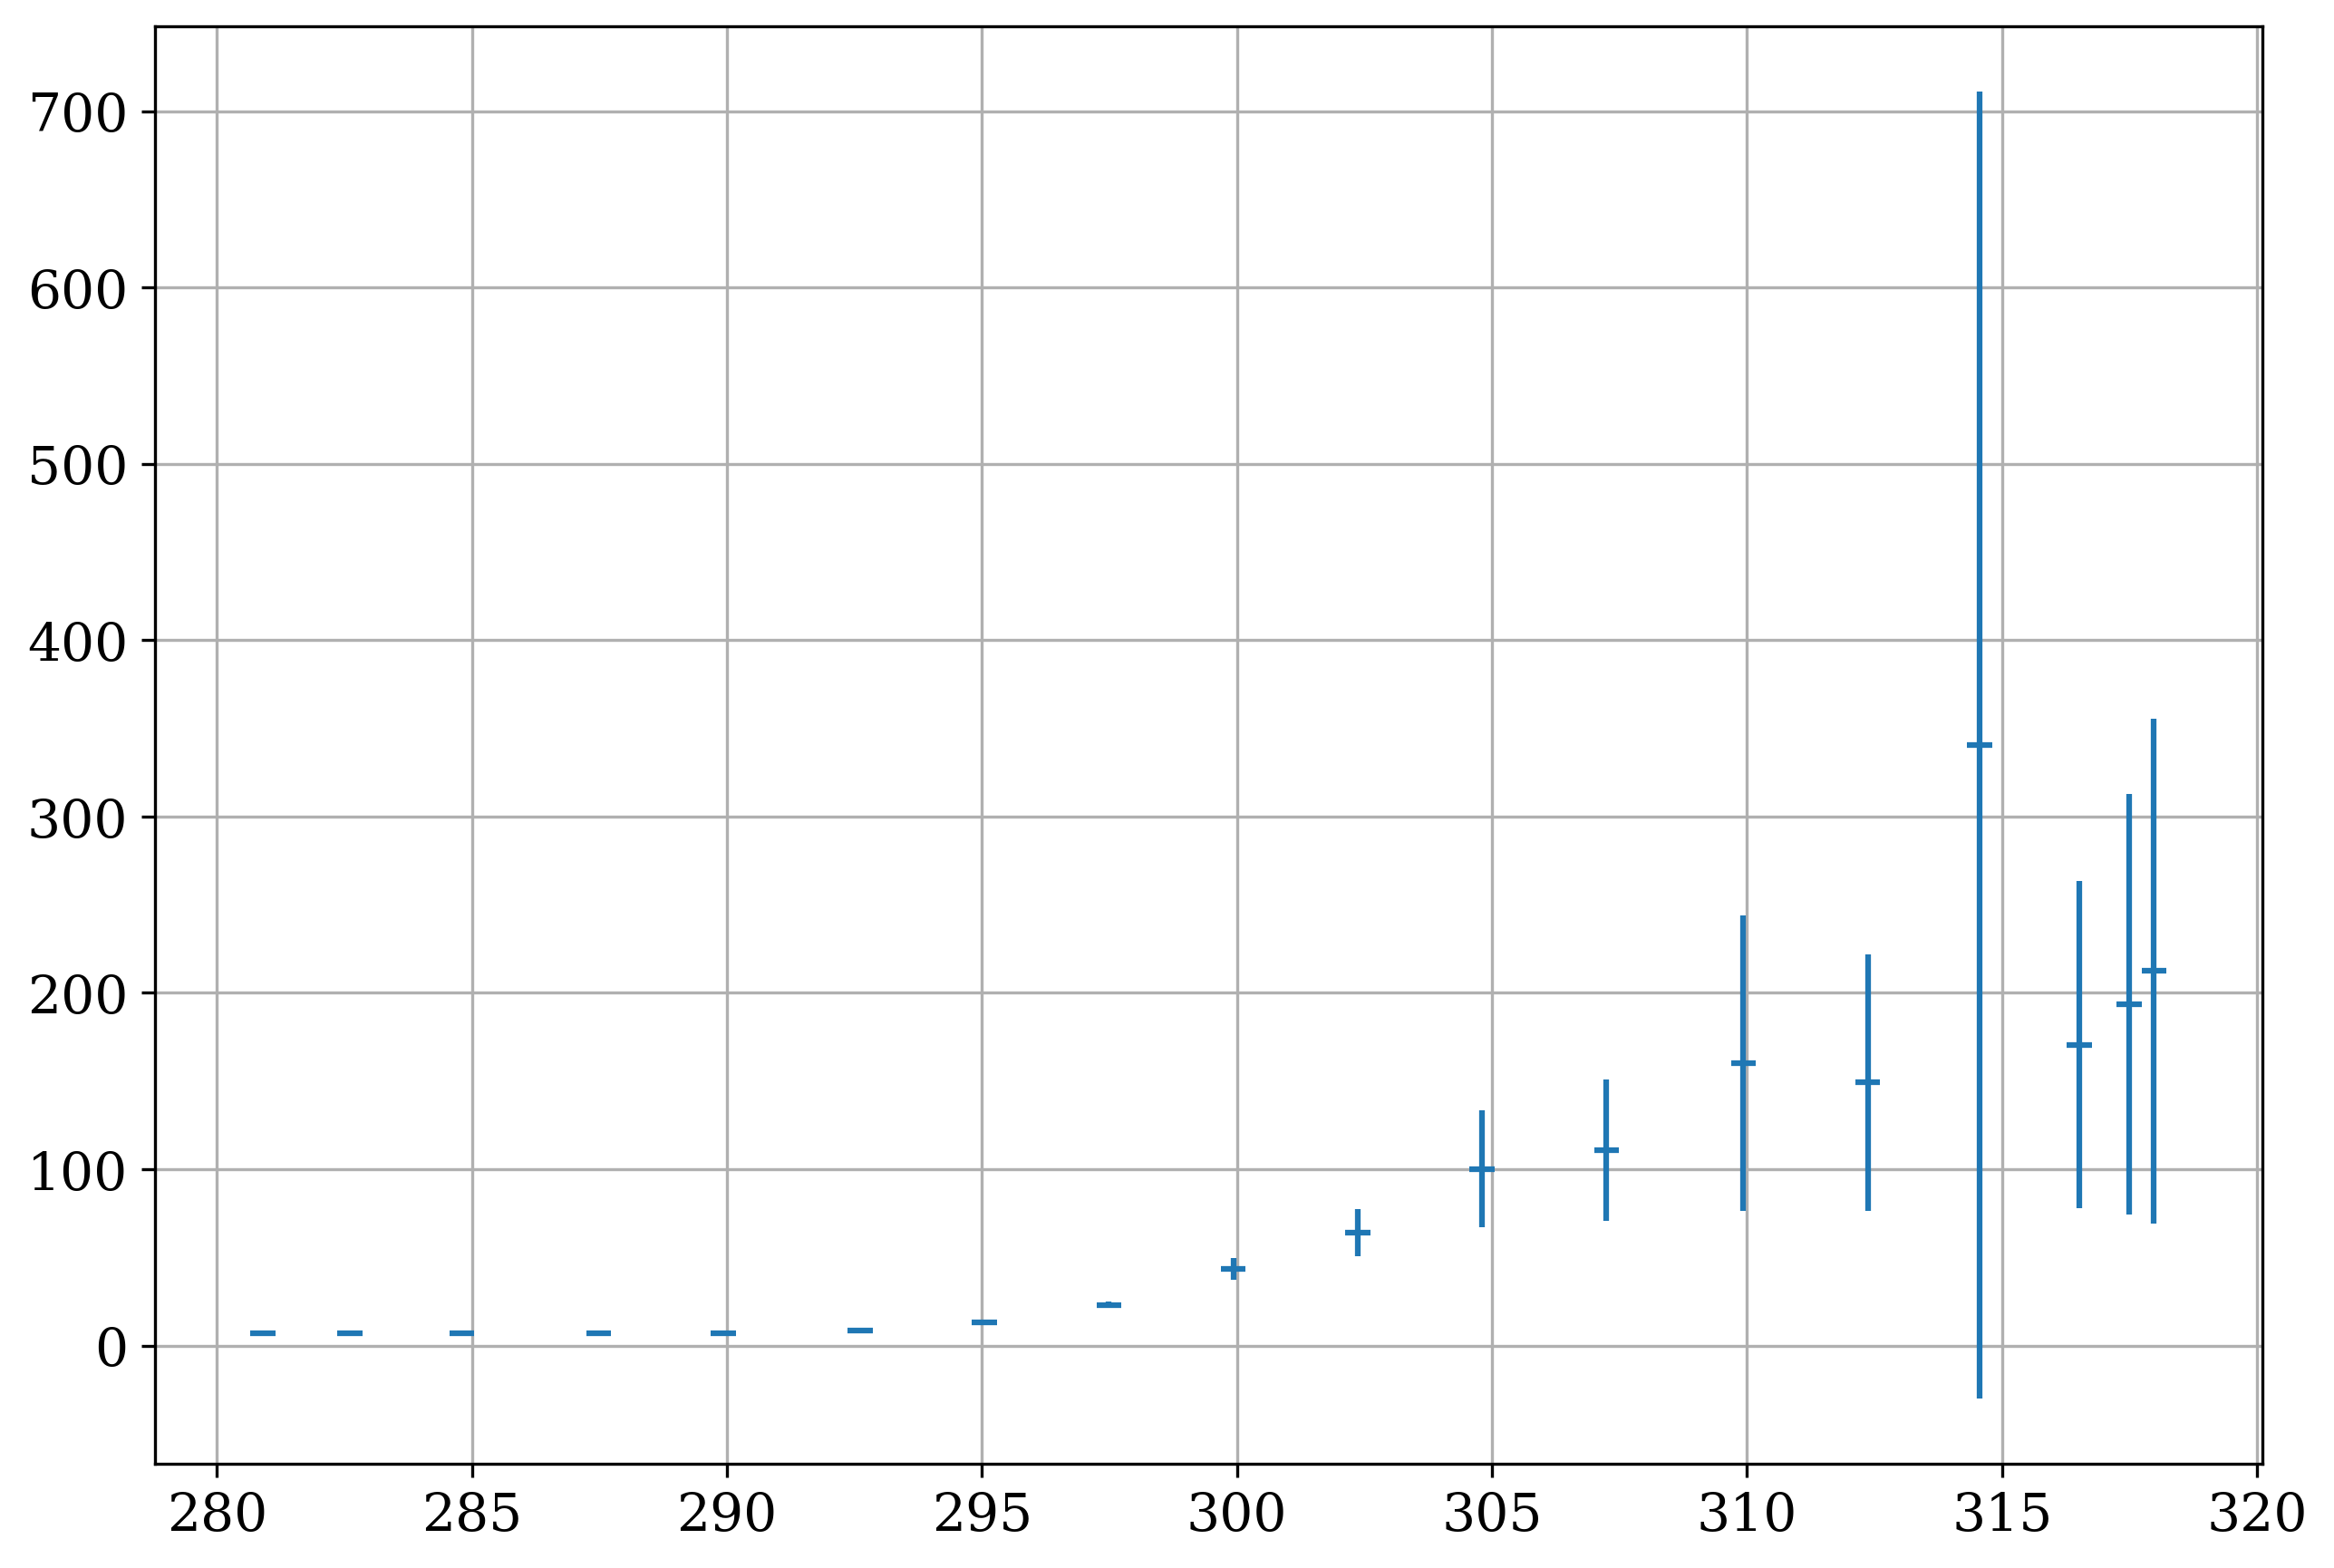

In [35]:
plt.errorbar(data["T"], data["y"], data["y_error"], 0.01/0.041, 'none')